                    Open          High           Low         Close     Volume  \
Date                                                                            
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703  112190000   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234  138740000   

               Adj Close  
Date                      
2016-07-01  17949.369141  
2016-06-30  17929.990234  
2016-06-29  17694.679688  
2016-06-28  17409.720703  
2016-06-27  17140.240234  


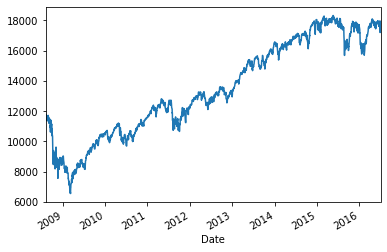

In [47]:
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
 
series = pd.read_csv('0.Raw_data/DJIA_table.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.iloc[:,0].plot()
pyplot.show()

In [58]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1988
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -12686.014
Method:                       css-mle   S.D. of innovations            142.930
Date:                Thu, 07 Nov 2019   AIC                          25378.027
Time:                        13:46:47   BIC                          25394.812
Sample:                             1   HQIC                         25384.192
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1237      2.983     -1.047      0.295      -8.970       2.723
ar.L1.D.Close    -0.0747      0.022     -3.340      0.001      -0.119      -0.031
                                    Root

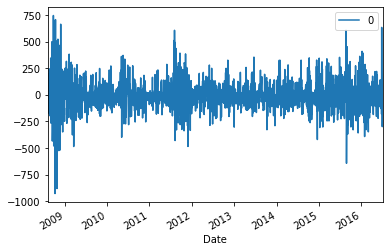

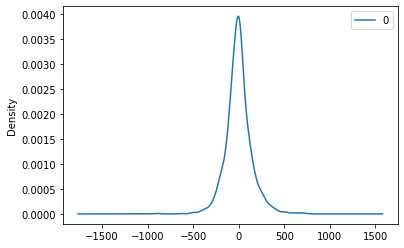

                 0
count  1988.000000
mean     -0.001079
std     142.965911
min    -927.340104
25%     -71.653149
50%      -4.335342
75%      65.131565
max     744.796112


In [78]:
model = ARIMA(series.iloc[:,3], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind="kde")
pyplot.show()
print(residuals.describe())

In [66]:
from sklearn.metrics import mean_squared_error

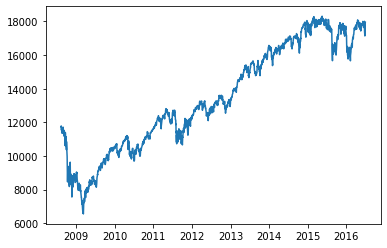

In [89]:
X = series.iloc[:,3]
plt.plot(X)

In [90]:
X = series.iloc[:,3]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print("predicted=%f, expected=%f" % (yhat, obs))
error = mean_squared_error(test, predictions)
print("Test MSE: %.3f" % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color="red")
pyplot.show()

predicted=12332.086929, expected=12285.150391
predicted=12282.829512, expected=12270.990234
predicted=12267.038858, expected=12263.580078
predicted=12259.371365, expected=12381.110352
predicted=12372.238260, expected=12380.049805
predicted=12375.697639, expected=12409.490234
predicted=12404.004754, expected=12426.750000
predicted=12421.745134, expected=12393.900391
predicted=12390.778404, expected=12400.030273
predicted=12395.433220, expected=12376.719727
predicted=12373.228306, expected=12319.730469
predicted=12317.477162, expected=12350.610352
predicted=12345.042242, expected=12279.009766
predicted=12277.299277, expected=12197.879883
predicted=12196.454119, expected=12220.589844
predicted=12215.242276, expected=12170.559570
predicted=12167.946942, expected=12086.019531
predicted=12084.644528, expected=12018.629883
predicted=12016.540204, expected=12036.530273
predicted=12031.240659, expected=11858.519531
predicted=11860.523109, expected=11774.589844
predicted=11772.911177, expected=1

ValueError: view limit minimum -36712.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

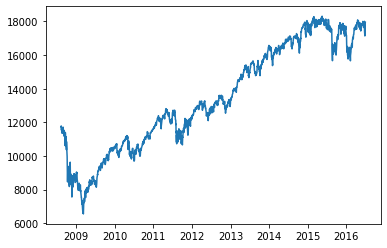

In [94]:
def 

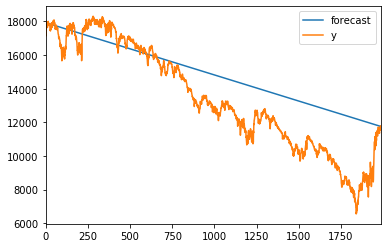

In [92]:
model_fit.plot_predict(dynamic=True)
plt.show()

In [67]:
series.iloc[:,3]

Date
2016-07-01    17949.369141
2016-06-30    17929.990234
2016-06-29    17694.679688
2016-06-28    17409.720703
2016-06-27    17140.240234
                  ...     
2008-08-14    11615.929688
2008-08-13    11532.959961
2008-08-12    11642.469727
2008-08-11    11782.349609
2008-08-08    11734.320312
Name: Close, Length: 1989, dtype: float64